In [1]:
import torchvision.transforms.v2 as v2
from torch import optim
import torch 

from dlvc.models.vit_opt import VisionTransformerShallow, VisionTransformerDeep, VisionTransformerDeepResidual

from dlvc.evaluation import cifar_load, train_model_opt, test_model, save_metrics, plot_metrics

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# # Perform grid search for hyperparameter optimization

# param_grid = {
#     'random_crop': [True, False],
#     'left_right_mirror': [True, False],
#     'dropout_rate': [0.25, 0.5],
#     'weight_decay': [0.0001, 0.001]
# }

# best_model_name = None
# best_model = None
# best_model_accuracy = 0.0
# best_parameters = None

# for i, params in enumerate(ParameterGrid(param_grid)):
        
#     if params['random_crop'] == True and params['left_right_mirror'] == True:
#         transform = v2.Compose([
#             v2.ToImage(), 
#             v2.RandomHorizontalFlip(),
#             v2.RandomCrop(32, padding=4),
#             v2.ToDtype(torch.float32, scale=True),
#             v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])
#         ])
#     elif params['random_crop'] == True and params['left_right_mirror'] == False:
#         transform = v2.Compose([
#             v2.ToImage(), 
#             v2.RandomCrop(32, padding=4),
#             v2.ToDtype(torch.float32, scale=True),
#             v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])
#         ])
#     elif params['random_crop'] == False and params['left_right_mirror'] == True:
#         transform = v2.Compose([
#             v2.ToImage(), 
#             v2.RandomHorizontalFlip(),
#             v2.ToDtype(torch.float32, scale=True),
#             v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])
#         ])
#     else:
#         transform = v2.Compose([
#             v2.ToImage(),
#             v2.ToDtype(torch.float32, scale=True),
#             v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])
#         ])

#     train_data_opt, val_data_opt, test_data_opt = cifar_load(transform)

#     model = VisionTransformerShallowOpt(dropout_rate=params['dropout_rate'])

#     optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=params['weight_decay'])

#     print(f'\n\n{i+1}/{len(ParameterGrid(param_grid))} Training model with hyperparameters: {params}')

#     name = model.__class__.__name__

#     for param in params:
#         name += "_"+param + "_" + str(params[param])

#     trainer = train_model_opt(model, optimizer, name, train_data_opt, val_data_opt)

#     trainer.train()

#     save_metrics(trainer, model.__class__.__name__, params)

#     model, test_metric = test_model(model, params, test_data_opt)

#     plot_metrics(trainer, name)


#     if test_metric.accuracy() > best_model_accuracy:
#         best_model_accuracy = test_metric.accuracy()
#         best_parameters = params
#         best_model = model
#         best_model_name = name

# print("Model:", best_model_name)
# print("Best model found with parameters:", best_parameters)
# print("Best test accuracy:", best_model_accuracy)

In [4]:
dropout_rate = 0.5

weight_decay = 0.0001

lr_rate = 0.001

        
transform_train = v2.Compose([
    v2.ToImage(), 
    v2.RandomHorizontalFlip(),
    v2.RandomCrop(32, padding=4),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])
])

transform_val = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])
])

train_data_opt, val_data_opt, test_data_opt = cifar_load(transform_train, transform_val)




 Training model with hyperparameters: dropout_rate=0.5, weight_decay=0.0001 and learning_rate=0.001

Training model:  VisionTransformerShallow

TRAIN, EPOCH: 0 
Loss: 2.629920244216919
Accuracy: 0.1338
Class Accuracy: 0.13320706114172937

VALIDATION, EPOCH: 0 
Loss: 2.2052104473114014
Accuracy: 0.1666
Class Accuracy: 0.16647931300103663
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EPOCH: 1 
Loss: 2.370744228363037
Accuracy: 0.1326
Class Accuracy: 0.1321685440838337

VALIDATION, EPOCH: 1 
Loss: 2.5657079219818115
Accuracy: 0.1715
Class Accuracy: 0.17190217562019824
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EPOCH: 2 
Loss: 2.4090781211853027
Accuracy: 0.1337
Class Accuracy: 0.13302063196897507

VALIDATION, EPOCH: 2 
Loss: 2.481100559234619
Accuracy: 0.2074
Class Accuracy: 0.2068159323418513
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EPOCH:

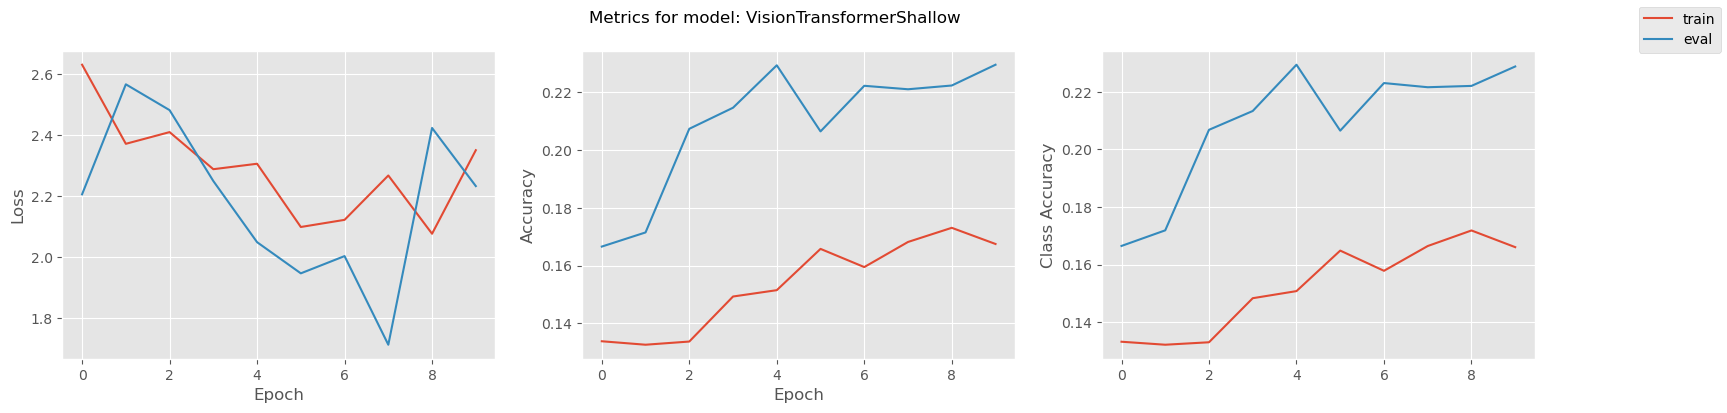

In [5]:
# Perform grid search for hyperparameter optimization
model = VisionTransformerShallow(dropout_rate=dropout_rate)

optimizer = optim.Adam(model.parameters(), lr=lr_rate, weight_decay=weight_decay)

print(f'\n\n Training model with hyperparameters: dropout_rate={dropout_rate}, weight_decay={weight_decay} and learning_rate={lr_rate}')

name = model.__class__.__name__

trainer = train_model_opt(model, optimizer, name, train_data_opt, val_data_opt)

trainer.train()

save_metrics(trainer, name)

model, test_metric = test_model(model, name, test_data_opt)

plot_metrics(trainer, name)



 Training model with hyperparameters: dropout_rate=0.5, weight_decay=0.0001 and learning_rate=0.001

Training model:  VisionTransformerDeep

TRAIN, EPOCH: 0 
Loss: 2.3038547039031982
Accuracy: 0.0986
Class Accuracy: 0.09769904483109712

VALIDATION, EPOCH: 0 
Loss: 2.33280348777771
Accuracy: 0.0977
Class Accuracy: 0.1
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EPOCH: 1 
Loss: 2.317124843597412
Accuracy: 0.1012
Class Accuracy: 0.09914091788232327

VALIDATION, EPOCH: 1 
Loss: 2.3034708499908447
Accuracy: 0.0977
Class Accuracy: 0.1
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EPOCH: 2 
Loss: 2.3045237064361572
Accuracy: 0.0962
Class Accuracy: 0.09441838244674727

VALIDATION, EPOCH: 2 
Loss: 2.3084778785705566
Accuracy: 0.1003
Class Accuracy: 0.1
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EPOCH: 3 
Loss: 2.315014362335205
Accuracy: 0.1015
Clas

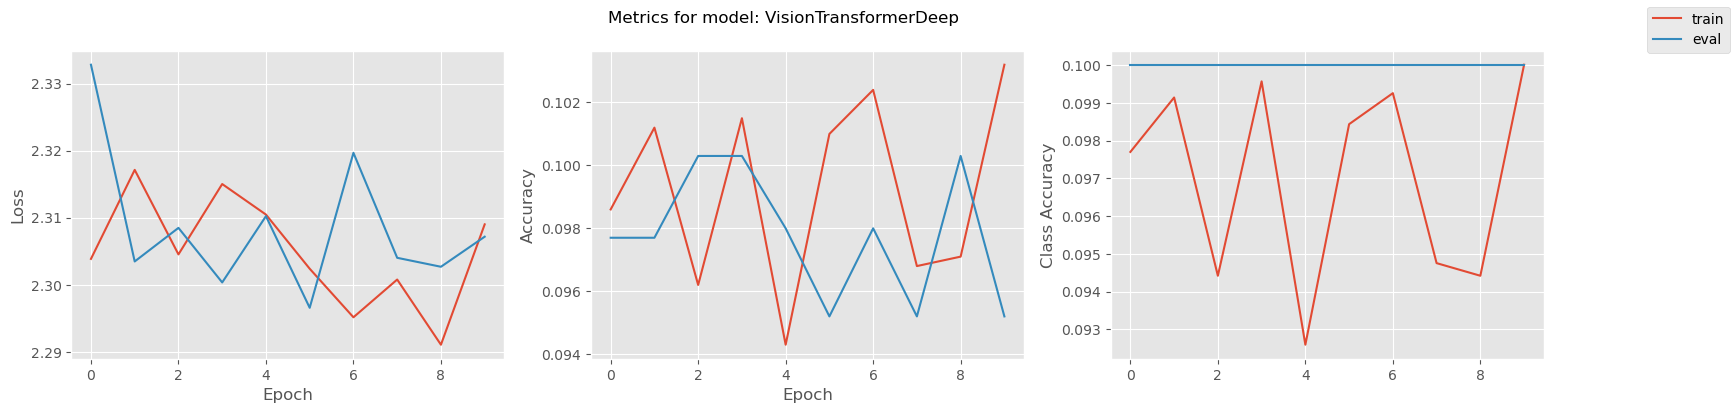

In [6]:
# Perform grid search for hyperparameter optimization
model = VisionTransformerDeep(dropout_rate=dropout_rate)

optimizer = optim.Adam(model.parameters(), lr=lr_rate, weight_decay=weight_decay)

print(f'\n\n Training model with hyperparameters: dropout_rate={dropout_rate}, weight_decay={weight_decay} and learning_rate={lr_rate}')

name = model.__class__.__name__

trainer = train_model_opt(model, optimizer, name, train_data_opt, val_data_opt)

trainer.train()

save_metrics(trainer, name)

model, test_metric = test_model(model, name, test_data_opt)

plot_metrics(trainer, name)



 Training model with hyperparameters: dropout_rate=0.5, weight_decay=0.0001 and learning_rate=0.001

Training model:  VisionTransformerDeepResidual

TRAIN, EPOCH: 0 
Loss: 241.9098358154297
Accuracy: 0.174
Class Accuracy: 0.17374088019132614

VALIDATION, EPOCH: 0 
Loss: 499.8027038574219
Accuracy: 0.1695
Class Accuracy: 0.16909658249933274
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EPOCH: 1 
Loss: 164.18954467773438
Accuracy: 0.2228
Class Accuracy: 0.2223655626177788

VALIDATION, EPOCH: 1 
Loss: 135.44236755371094
Accuracy: 0.2545
Class Accuracy: 0.2548723111860454
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EPOCH: 2 
Loss: 103.17784118652344
Accuracy: 0.2225
Class Accuracy: 0.22239828556776048

VALIDATION, EPOCH: 2 
Loss: 189.6961669921875
Accuracy: 0.2378
Class Accuracy: 0.23908430822193621
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EP

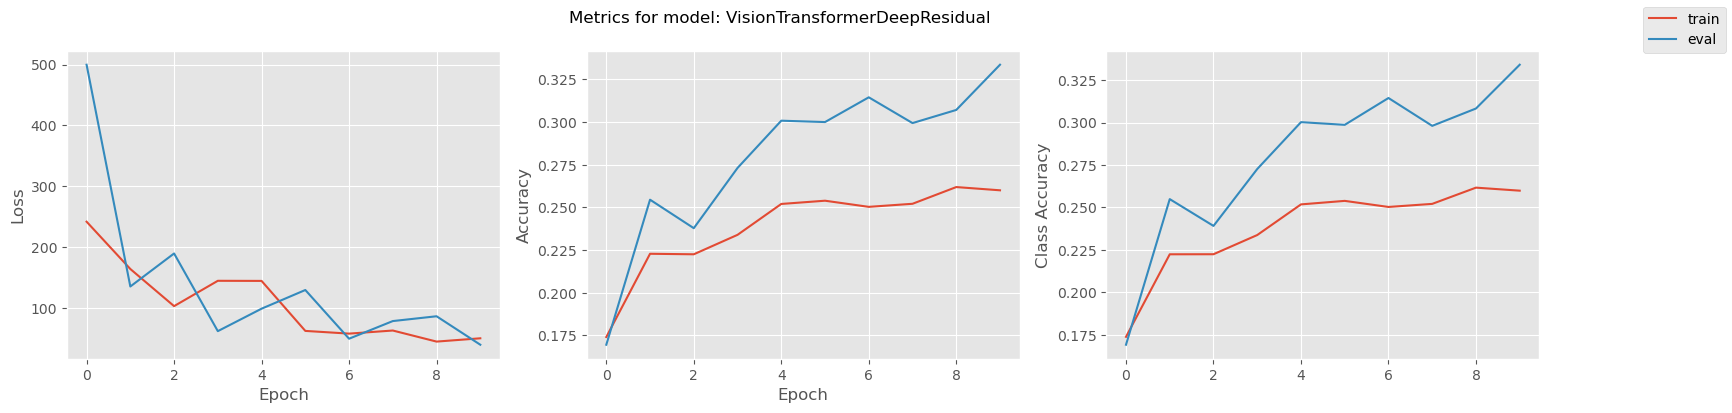

In [7]:
# Perform grid search for hyperparameter optimization
model = VisionTransformerDeepResidual(dropout_rate=dropout_rate)

optimizer = optim.Adam(model.parameters(), lr=lr_rate, weight_decay=weight_decay)

print(f'\n\n Training model with hyperparameters: dropout_rate={dropout_rate}, weight_decay={weight_decay} and learning_rate={lr_rate}')

name = model.__class__.__name__

trainer = train_model_opt(model, optimizer, name, train_data_opt, val_data_opt)

trainer.train()

save_metrics(trainer, name)

model, test_metric = test_model(model, name, test_data_opt)

plot_metrics(trainer, name)